# Example #1 - pricing a straddle

Using some more complex (but still simple) operations, we can approximate the price of an ATMF straddle.

$$ STRADDLE_{ATMF} \approx \frac{2}{\sqrt{2\pi}} F \times \sigma \sqrt(T) $$
$$ \sigma = implied volatility $$
$$ T = time-to-maturity $$
$$ F = forward of the underlier $$

Let's start with defining the straddle's implied volatility and time-to-maturity. Note, we will assume F is equal to 1 and the straddle price can be scaled accordingly. 

In [1]:
vol = 0.2
time = 1.

In [2]:
2. * ( (1 / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 )

0.15961737689352445

This is a lot to type again and again if you want to price several straddles, which is really annoying and error prone. Let's define a function for this so that we can use it over and over

In [3]:
def straddlePricer( vol, time ):
    return 2. * ( ( 1. / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 )

Notice this doesn't immediately return anything to the output area. Rest assured the function is defined and we can begin using it. Below, we can compare the function's output to the output of the cell above.

In [4]:
print( straddlePricer( 0.2, 1.0 ) )
print( 2. * ( ( 1. / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 ) )
print( straddlePricer( 0.2, 1.0 ) == ( 2. * ( ( 1. / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 ) ) )

0.15961737689352445
0.15961737689352445
True


Input order doesn't matter as long as we let the function know what we're using as inputs

In [5]:
print( straddlePricer( time=1.0, vol=0.2 ) )
print( straddlePricer( vol=0.2, time=1.0 ) )

0.15961737689352445
0.15961737689352445


This is nice, but what if I want to default to certain inputs? By setting the initial inputs below we're implictly calling each of these arguments "optional". Initially, we'll make only `time` and optional arguement (input).  

In [6]:
def straddlePricer( vol, time=1.0 ):
    return 2. * ( ( 1 / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 )

In [7]:
straddlePricer( 0.2 )

0.15961737689352445

Now, we'll make both `vol` and `time` optional.

In [8]:
def straddlePricer( vol=0.2, time=1.0 ):
    return 2. * ( ( 1 / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 )

In other words, we don't need to pass these arguments to call the function. It will use 0.2 for `vol` and 1.0 for `time` by default unless instructed otherwise.

In [9]:
straddlePricer()

0.15961737689352445

In [10]:
straddlePricer( 0.22 )

0.1755791145828769

Notice, there's π in the denominator of the straddle price formula, but the value we used above (3.14) is an rough approximation. Is there a more precise value we could use? Yes, we can use a library called `numpy`. Let's import it first below.

In [11]:
import numpy

You can access functions of numpy by entering `numpy.xxxxx`, where `xxxxx` is the function you would like to use. `numpy`'s implementation of `pi` is simply `numpy.pi`.

In [12]:
numpy.pi

3.141592653589793

Typing `numpy` over and over again can get pretty tedious. Let's make it easier for ourselves by abbreviating the name. Python convention for `numpy` abbreviation is `np`.

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

In [14]:
np.pi

3.141592653589793

`numpy` also has a handy square root function (`np.sqrt`)

In [15]:
np.sqrt( 4 )

2.0

Let's incorporate `np.pi` and `np.sqrt` into our simple straddle pricer to make things a little more precise and easier to read.

In [16]:
def straddlePricer( vol=0.2, time=1.0 ):
    return 2. * ( ( 1 / np.sqrt( 2 * np.pi ) ) * vol * np.sqrt( time ) )

straddlePricer()

0.1595769121605731

Let's see what the difference is between our original implementation and our new and improved implemenation.

In [17]:
straddlePricer() - ( 2. * ( ( 1 / ( 2 * 3.14 ) ** 0.5 ) * vol * time ** 0.5 ) )

-4.046473295135633e-05

In this case, the difference in precision and readability isn't huge, but that difference can be valuable at times. In addition to the functionality above, `numpy` can do a lot of other things. For instance, we can generate some random numbers.

In [18]:
np.random.rand()

0.15016423683392166

Is there a way to see what functions are available? Yes, just tab after `np.`

In [19]:
#np.

Alternatively, we can call `dir` on `np` to see what is included.

In [20]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_arg',
 '_distributor_init',


Continuing with the prior example of pricing our straddle, we can also price the straddle using the Monte Carlo method. We need to generate a normally distributed set of random numbers to simulate the asset's movement through time.

In [21]:
def straddlePricerMC(vol=0.2, time=1.0, mcPaths=100):
    dailyVol = vol / np.sqrt( 252. )
    resultSum = 0
    for p in range( mcPaths ):
        resultSum += np.abs( np.prod( ( 1 + np.random.normal( 0, dailyVol, int( round( time * 252 ) ) ) ) ) - 1 )
    return resultSum / mcPaths

straddlePricerMC()

0.17710412451122579

There's a lot of new things going on here. Let's unpack it one line at a time.

We know the variance scales linearly with time, so we can either

1. divide the variance by time and take the square root to get a daily volatility, or
2. take the square root of variance (volatility) and divide by the root of time
    
Generally, the latter is clearer and simpler to understand since we typically think in vol terms, but you are free to use whichever method you want.

In [22]:
# Option #1 above
np.sqrt( vol ** 2 / 252 )

0.012598815766974242

In [23]:
# Comparing the two methods
vol = 0.2
var = vol ** 2
sqrtVarOverTime = np.sqrt( var / 252 )
volOverSqrtTime = vol / np.sqrt( 252 )
valuesEqual = np.isclose( sqrtVarOverTime, volOverSqrtTime )
print( f'sqrtVarOverTime = {sqrtVarOverTime}\nvolOverSqrtTime = {volOverSqrtTime}\nAre they close? {valuesEqual}' )

sqrtVarOverTime = 0.012598815766974242
volOverSqrtTime = 0.01259881576697424
Are they close? True


The next line isn't super exciting, but we set the default value of our cumulative sum to be 0. So we're just defining resultSum and setting it equal to 0. If we don't do this we'll get an error. 

In [24]:
resultSum = 0

Next we have a loop. There are different types of loops we can use. Here we use a `for` loop, which says "iterate over each element in `range(mcPaths)`". But wait...what's `range(mcPaths)`? `range` is a native python function that will return an iterator over a list of ints starting at 0 and going to x-1.

In [25]:
range10 = range( 10 )
lst = list( range10 )
print( lst )
print( len( lst ) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10


In our case, we don't really want to do anything with `p`, so it is good practice to set it to `_`. We just want to iterate through the loop `mcPaths` times. In the default case, the function runs through the loop 100 times.

In [26]:
def straddlePricerMC( vol=0.2, time=1.0, mcPaths=100 ):
    dailyVol = vol / np.sqrt( 252. )
    resultSum = 0
    for _ in range( mcPaths ):
        resultSum += np.abs( np.prod( 1 + ( np.random.normal( 0, dailyVol, int( round( time * 252 ) ) ) ) ) - 1 )
    return resultSum / mcPaths

straddlePricerMC()

0.1374859635482265

To unpack what the function does at each iteration of the loop, let's unpack this one step at a time. We start with the innermost function call and work backwards from there. Let's ask for help to see what the `np.random.normal` method actually does. Thankfully, there are two handy ways to see a function's documentation.

1. help
2. ?

In [27]:
help(np.random.normal)
# np.random.normal?

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

Ok, so we know from the help function that the `np.random.normal` method takes three optional inputs: mean, standard deviation, and size of the array to generate multiple random numbers. It defaults to a distribution with a mean of zero and a standard deviation of 1, returning only 1 random number.

In [28]:
np.random.normal()

0.5962432247411761

Below we're going to call this method with a mean of zero (no drift) and a standard deviation of our daily vol, so that we can generate multiple days of returns. Specifically, we ask to generate the number of days to maturity.

In [29]:
time = 1
nDays = time * 252
dailyVol = vol / np.sqrt( 252. )
print( nDays )

np.random.normal( 0, dailyVol, nDays )

252


array([-9.34354009e-03, -2.44049809e-03, -9.55832966e-03, -2.66708539e-02,
        7.66972312e-03, -2.72576565e-03, -1.98172393e-02,  1.70626460e-02,
        4.92307776e-03,  1.25172168e-02,  9.18433019e-03,  5.06898532e-03,
        3.34005402e-03,  1.32198291e-02, -8.69644472e-03,  4.77043187e-03,
       -4.05973756e-03,  8.90613986e-03,  6.29276662e-03,  5.22558966e-03,
        1.07788685e-02, -6.48109108e-03,  1.30598918e-02,  2.93016276e-03,
       -3.69656324e-03,  5.10803678e-03,  5.37153934e-03,  1.12976339e-02,
        6.46647767e-03, -2.88112770e-03, -2.69727076e-04,  1.68333266e-02,
        2.12430096e-02,  1.06135512e-03, -6.13097857e-03, -1.43169092e-02,
        2.67715740e-03, -9.41104171e-03, -5.57679301e-03, -1.30091783e-02,
       -7.36672118e-04, -6.77718729e-03,  5.38095292e-03, -5.21730791e-03,
        2.17680365e-03, -3.03502306e-03,  1.23044115e-02,  1.24539053e-02,
       -5.09552091e-03,  2.40862470e-03,  3.69097906e-03,  1.87921756e-02,
        1.06728578e-02, -

Now, given we have an asset return timeseries, how much is a straddle worth? We're interested in the terminal value of the asset and because we assume the straddle is struck ATM, we can just take the absolute value of the asset's deviation from the initial value (in this case, 1)

In [30]:
np.random.seed( 42 ) # guarantee the same result from the two random series

returns = np.random.normal( 0, dailyVol, time * 252 )
priceAtMaturity = np.prod( 1 + returns )
changeAtMaturity = priceAtMaturity - 1
absChangeAtMaturity = np.abs( changeAtMaturity )
print( absChangeAtMaturity )

# all together in one line
np.random.seed( 42 )
print( np.abs( np.prod( 1 + ( np.random.normal( 0, dailyVol, time * 252 ) ) ) - 1 ) )

0.030088573823511933
0.030088573823511933


Let's take a closer look at what we did above. This time, we're going to utilize another two libraries called pandas and perspective to make our life a little easier.

In [31]:
import pandas as pd
from perspective import psp

simulatedAsset = pd.DataFrame( np.random.normal( 0, dailyVol, time * 252 ) + 1, columns=['return'] )
simulatedAsset['price'] = ( 1 * simulatedAsset['return'] ).cumprod()
psp( simulatedAsset )

ModuleNotFoundError: No module named 'perspective'

The `for` loop ultimately just does the above for `mcPaths` number of times, and we ultimately take the average of the paths to find the expected value of the straddle.

In [33]:
mcPaths = 100
resultSum = 0.
for _ in range(mcPaths):
    resultSum += np.abs( np.prod( 1 + np.random.normal( 0., dailyVol, time * 252 ) ) - 1 )
print( resultSum / mcPaths )

0.14729794955899883


This price is pretty close to the price from our original pricer. More paths should help get us even closer.

In [34]:
straddlePricerMC(mcPaths=2000)

0.15838729969079304

2000 paths is a lot, but it looks like we're still not converging to the original price. If we add more paths there is a tradeoff with compute time. Luckily, Jupyter has made it really easy to see how fast our function is.

In [35]:
%timeit straddlePricerMC(mcPaths=2000)

47.8 ms ± 741 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


That's pretty fast. we can do a lot more paths.

In [36]:
print(f"1 path: {straddlePricerMC(mcPaths=1)}")
print(f"2000 path: {straddlePricerMC(mcPaths=2000)}")
print(f"5000 path: {straddlePricerMC(mcPaths=5000)}")
print(f"10000 path: {straddlePricerMC(mcPaths=10000)}")
print(f"100000 path: {straddlePricerMC(mcPaths=100000)}")
print(f"Closed form approximation: {straddlePricer()}")

1 path: 0.16793984838348808
2000 path: 0.16065625818207094
5000 path: 0.1567453624752709
10000 path: 0.15951738899863668
100000 path: 0.1589384046092952
Closed form approximation: 0.1595769121605731


Can we improve the above MC implementation? Of course! We can generate our random asset series in one go. Remember the `size` argument of the `np.random.normal` function

In [38]:
nDays = time * 252
size = (nDays, 15)
simulatedAsset = pd.DataFrame(np.random.normal(0, dailyVol, size))
simulatedAsset = (1 + simulatedAsset).cumprod()

simulatedAsset.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
247,1.206925,1.249108,0.836715,1.144464,1.197003,1.291686,1.234129,1.154227,1.495678,0.856200,0.994164,1.122139,1.109763,1.526175,1.292144
248,1.221997,1.239096,0.838491,1.129086,1.189413,1.281384,1.255035,1.130503,1.462090,0.843706,0.990463,1.101980,1.112710,1.540268,1.283429
249,1.215982,1.222893,0.820812,1.134397,1.184557,1.280407,1.254966,1.137677,1.478903,0.840697,0.967654,1.077506,1.117208,1.569522,1.284879
250,1.217768,1.226355,0.827850,1.141511,1.182087,1.287840,1.266439,1.144017,1.473403,0.835974,0.970472,1.072612,1.135446,1.570084,1.307709
251,1.211961,1.235648,0.814335,1.147893,1.216877,1.311225,1.277063,1.161203,1.447072,0.836063,0.955262,1.081346,1.109235,1.578792,1.314490


Cool!...Let's visualize by plotting it with matplotlib.

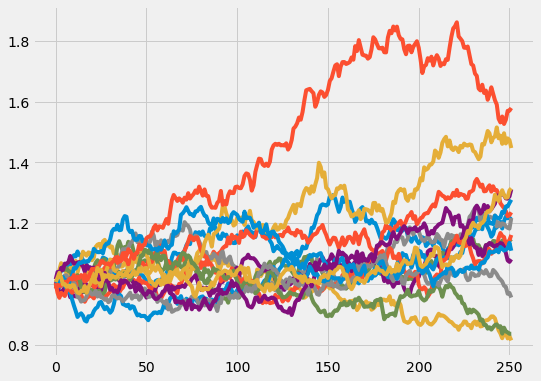

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,6))
ax = plt.axes()
_ = ax.plot(simulatedAsset)

So let's incorporate that into a `pandas` version of the MC pricer.

In [40]:
def straddlePricerMCWithPD(vol=0.2, time=1, mcPaths=100000):
    dailyVol = vol / ( 252 ** 0.5 )
    randomPaths = pd.DataFrame( np.random.normal( 0, dailyVol, ( time*252, mcPaths ) ) )
    price = ( ( 1 + randomPaths ).prod() - 1 ).abs().sum() / mcPaths
    return price

straddlePricerMCWithPD()

0.15900508112214654